#### Instituto Federal de Educação Tecnológica de Minas Gerais - Campus Ouro Preto
#### Especialização em Inteligência Artificial – IFMG
#### Trabalho da disciplina de Aprendizado de Máquina
###### Professor: Frederico Gadelha Guimarães
###### Aluno: Dionízio Júnio Inácio
 


##### Conforme solicitado pelo enunciado do trabalho, o código abaixo inclui a aplicação das técnicas de Apredizado de Máquina, KNN, Naive Bayes e Árvore de decisão
##### seguindo um pipeline completo e contendo considerações finais sobre a aplicação de cada uma das técnicas, bem como as devidas comparações entre os resultados.

##### O texto abaixo conta uma história sobre a base, retirado da base original encontrado no link:

##### https://www.kaggle.com/datasets/unmoved/cure-the-princess

##### Story:
##### Once upon a time, in a far-off land, there lived a beautiful princess who had fallen gravely ill. The king and queen of the land tried everything in their power to cure her, but none of the remedies they tried seemed to work.

##### A group of local villagers approached the king and queen and told them about a set of magical ingredients that were said to have the power to cure any ailment. However, the villagers warned that these ingredients could be volatile in their effects, in addition, due to the recent droughts, only so many of the ingredients may be available at any given time, and only a skilled alchemist would be able to determine if a specific combination of these particularly volatile and scarce ingredients would to cure the princess.

##### The king and queen were desperate to save their daughter, so they set out to find the best alchemist in the land. They searched high and low and finally found an alchemist who had a reputation for being a master of a new magical art known as "Data Science and Machine Learning"

##### The alchemist first examined the claims of the villagers and the amounts they had taken of each ingredient, along with whether or not it had led to a cure. The alchemist knew that this was their one shot at curing the princess, and they had to get it right.


In [249]:
#Importando as bibliotecas necessárias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [250]:
# Obtendo os dados da base
df = pd.read_csv('Cure The Princess DB.csv')
df



,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,9.4,2.2,15.8,5.9,29.7,18.7,11.5,13.1,15.3,22.5,10.1,4.7,13.8,0
2334,12.1,7.6,20.6,5.3,18.9,19.1,9.4,11.9,21.8,12.0,26.7,8.4,24.4,1
2335,15.2,33.2,7.2,14.5,16.0,16.7,1.2,32.5,34.5,25.9,3.9,18.0,19.2,1
2336,2.0,17.0,33.2,13.2,29.1,35.5,19.7,30.3,30.7,4.3,15.7,20.5,2.1,1


#### Análise Exploratória dos dados

In [251]:
#Visualização das primeiras linhas do DF
df.head(10)

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
5,21.9,5.5,11.5,5.0,27.9,20.9,20.5,22.7,33.9,7.4,3.6,38.4,5.2,1
6,30.0,8.6,29.1,26.0,18.6,13.8,3.8,19.1,42.3,17.3,16.8,16.3,4.5,1
7,16.4,12.1,14.2,22.0,15.6,10.4,11.7,18.4,21.0,20.3,4.0,15.7,15.3,0
8,28.4,18.9,30.3,5.6,18.0,9.9,6.2,24.4,14.4,2.7,15.1,41.6,7.0,0
9,11.8,17.7,8.8,22.9,6.1,5.8,15.7,2.6,16.5,23.7,25.2,1.7,1.1,1


In [252]:
#Estátistica descritiva das variáveis
df.describe()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,15.365697,10.946749,16.115654,13.627973,15.069504,14.157271,12.328914,14.911206,16.871685,14.890590,10.916125,15.371600,12.084003,0.496578
std,8.669969,7.225162,8.372518,7.545244,8.349340,7.831476,7.709753,8.132678,9.579027,8.014197,7.045195,8.559139,8.047540,0.500095
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.500000,5.300000,9.600000,7.600000,8.625000,7.900000,6.325000,8.400000,8.900000,8.800000,5.200000,8.800000,5.600000,0.000000
50%,14.700000,9.500000,15.800000,13.100000,14.500000,13.500000,11.200000,14.400000,16.300000,14.400000,9.700000,14.800000,10.500000,0.000000
75%,21.300000,15.575000,22.000000,19.000000,20.700000,19.500000,16.900000,20.500000,24.000000,20.400000,15.375000,21.100000,17.275000,1.000000
max,42.100000,34.100000,40.800000,35.800000,40.400000,37.800000,37.300000,39.400000,44.800000,39.500000,33.700000,42.000000,37.800000,1.000000


In [253]:
#Dispersão das features
#sns.pairplot(df, hue='Cured', markers=["o", "s"])
#plt.show()

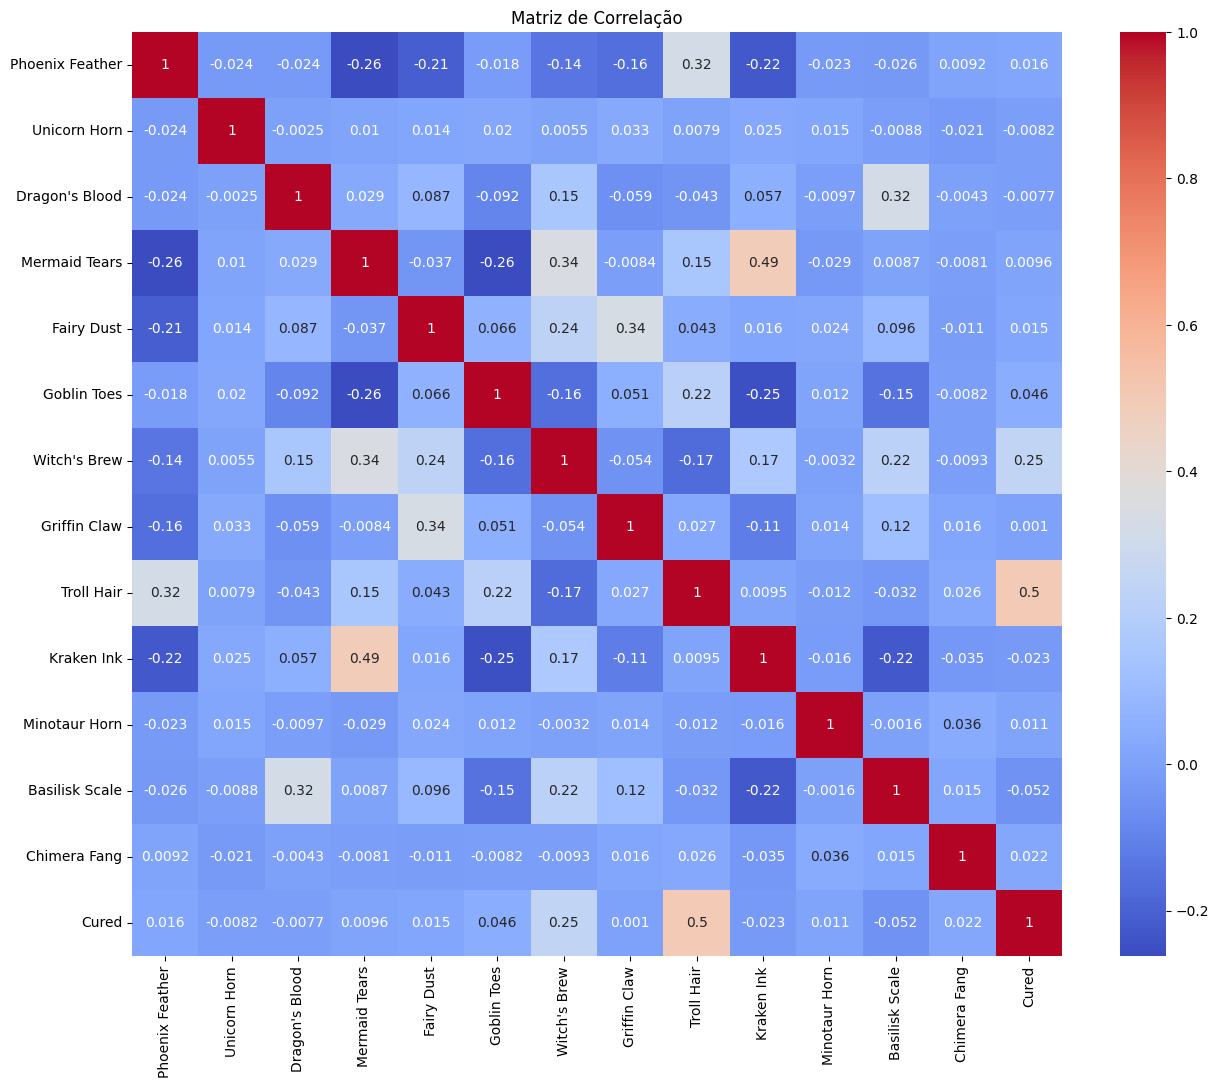

In [254]:
#Correlação dos dados 
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


##### 

#### Preparando os dados para aplicação dos modelos

In [255]:
# Separar features (X) e variável target (y)
X = df.drop('Cured', axis=1)
y = df['Cured']

In [256]:
# Normalizando as classes 
# Escalonamento padrão para normalizar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [257]:
# Aplicando validação cruzada K-fold
# Validação Cruzada K-Fold
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Armazenamento dos valores de acurácia
acuracias_knn = []
acuracias_nb = []
acuracias_dt = []

for indice_treino, indice_teste in k_fold.split(X_scaled):
    X_treino, X_teste = X_scaled[indice_treino], X_scaled[indice_teste]
    y_treino, y_teste = y.iloc[indice_treino], y.iloc[indice_teste]

    # Aplicando modelo de KNN
    modelo_knn = KNeighborsClassifier(n_neighbors=3)
    modelo_knn.fit(X_treino, y_treino)
    y_pred_knn = modelo_knn.predict(X_teste)
    acuracias_knn.append(accuracy_score(y_teste, y_pred_knn))

    # Aplicando modelo de Naive Bayes
    modelo_nb = GaussianNB()
    modelo_nb.fit(X_treino, y_treino)
    y_pred_nb = modelo_nb.predict(X_teste)
    acuracias_nb.append(accuracy_score(y_teste, y_pred_nb))

    # Aplicando modelo de Árvore de Decisão
    modelo_dt = DecisionTreeClassifier(random_state=42)
    modelo_dt.fit(X_treino, y_treino)
    y_pred_dt = modelo_dt.predict(X_teste)
    acuracias_dt.append(accuracy_score(y_teste, y_pred_dt))

# Calculando a acurácia média de cada modelo
acuracia_media_knn = np.mean(acuracias_knn)
acuracia_media_nb = np.mean(acuracias_nb)
acuracia_media_dt = np.mean(acuracias_dt)

print("Acurácia média do modelo KNN:", acuracia_media_knn)
print("Acurácia média do modelo Naive Bayes:", acuracia_media_nb)
print("Acurácia média do modelo da Árvore de Decisão:", acuracia_media_dt)

Acurácia média do modelo KNN: 0.9011996925273156
Acurácia média do modelo Naive Bayes: 0.7899961565914457
Acurácia média do modelo da Árvore de Decisão: 0.8494481963432712


#### Matriz de confusão e curva ROC para cada um dos modelos

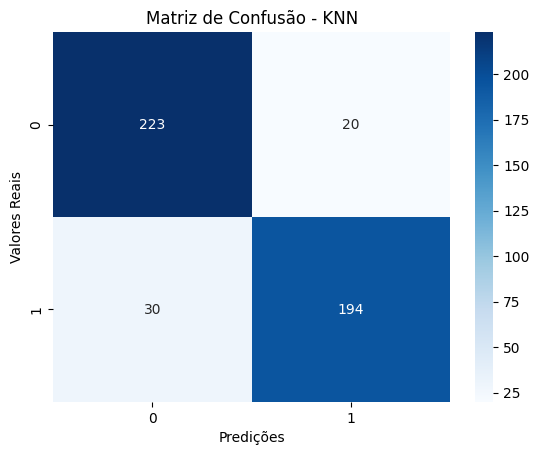

In [258]:
# Matriz de confusão para modelo KNN
conf_matrix_knn = confusion_matrix(y_teste, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - KNN')
plt.show()

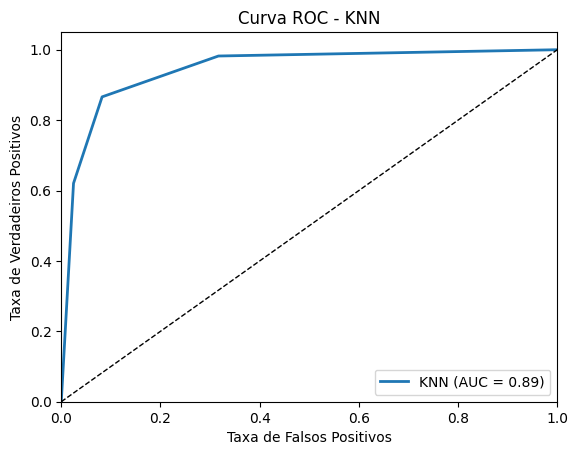

In [259]:
# Curva ROC para modelo KNN
fpr_knn, tpr_knn, _ = roc_curve(y_teste, modelo_knn.predict_proba(X_teste)[:, 1])
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_score(y_teste, y_pred_knn)), linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - KNN')
plt.legend()
plt.show()

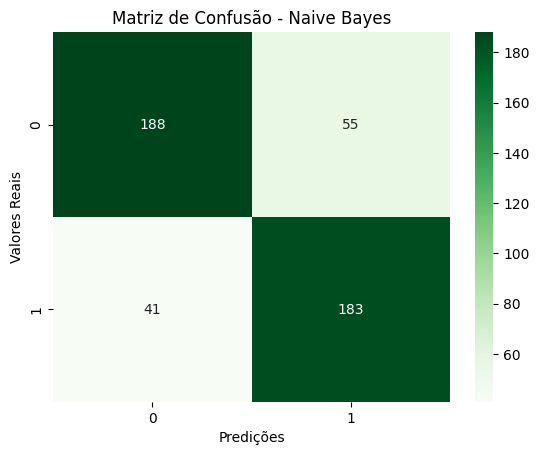

In [260]:
# Matriz de confusão para modelo Naive Bayes
conf_matrix_nb = confusion_matrix(y_teste, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - Naive Bayes')
plt.show()

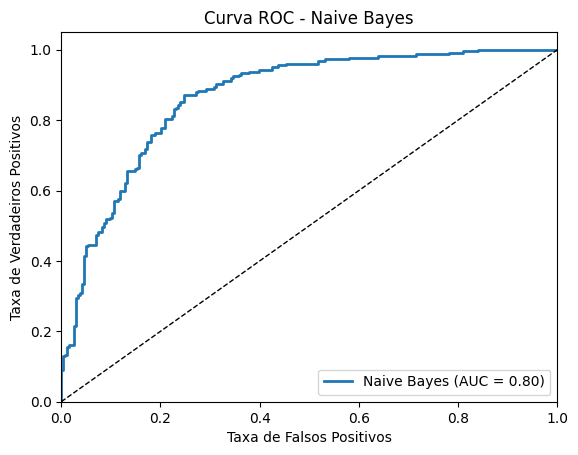

In [261]:
# Curva ROC para modelo Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_teste, modelo_nb.predict_proba(X_teste)[:, 1])
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_score(y_teste, y_pred_nb)), linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Naive Bayes')
plt.legend()
plt.show()

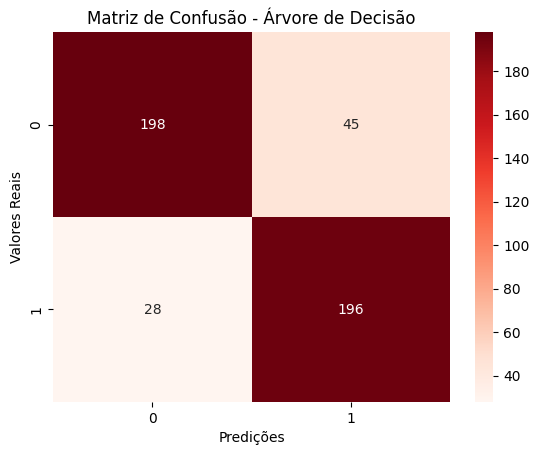

In [262]:
# Matriz de Confusão para modelo de Árvore de Decisão
conf_matrix_dt = confusion_matrix(y_teste, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

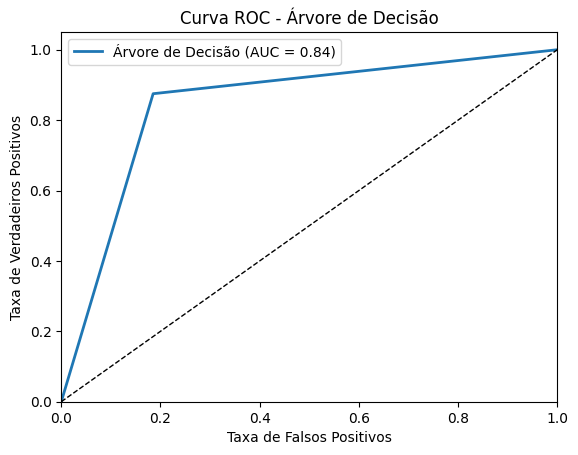

In [263]:
#Curva ROC para modelo de Árvore de Decisão
fpr_dt, tpr_dt, _ = roc_curve(y_teste, modelo_dt.predict_proba(X_teste)[:, 1])
plt.plot(fpr_dt, tpr_dt, label='Árvore de Decisão (AUC = {:.2f})'.format(roc_auc_score(y_teste, y_pred_dt)), linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Árvore de Decisão')
plt.legend()
plt.show()

#### Conclusão:

##### O modelo KNN obteve a maior acurácia (0.90) entre os três modelos, indicando que teve a melhor taxa de acerto na classificação dos dados de teste.
##### A Curva ROC do modelo KNN também possui a maior AUC (0.89), o que sugere que ele possui uma boa capacidade de distinguir entre as classes positiva (princesa curada) e negativa (princesa não curada).
##### O modelo Naive Bayes obteve uma acurácia de 0.79, sendo a menor das três, mas ainda mostrou um desempenho razoável.
##### O AUC do modelo Naive Bayes é 0.80, indicando um desempenho razoável na classificação.
##### A Árvore de Decisão teve uma acurácia de 0.85 e um AUC de 0.84, mostrando resultados intermediários em comparação com os outros modelos.

##### Portanto, com base nas métricas avaliadas, o modelo KNN parece ser o mais eficaz na classificação dos dados em relação aos outros dois modelos.